In [4]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
pd.options.mode.chained_assignment = None 

In [12]:
df=pd.read_csv('Dataset1_Cleaned.csv')

In [13]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [14]:
df['indexDate'] = range(1, len(df) + 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 3 columns):
Date         3647 non-null object
Temp         3647 non-null float64
indexDate    3647 non-null int32
dtypes: float64(1), int32(1), object(1)
memory usage: 71.4+ KB


In [16]:
X=df[['indexDate']]
y=df[['Temp']]

In [17]:
 #Break off validation set from training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [18]:
X_train.shape

(2917, 1)

In [19]:
def get_mae(n_estimators, X_train, X_test, y_train, y_test):
    model = XGBRegressor(objective='reg:squarederror',n_estimators= n_estimators)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_squared_error(y_test, preds_val)
    return(mae)

In [20]:
# compare MAE with differing values of max_leaf_nodes
for n_estimators in range(50,200,25):
    my_mae = get_mae(n_estimators, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %.2f" %(n_estimators, my_mae))

Max leaf nodes: 50  		 Mean Absolute Error:  6.77
Max leaf nodes: 75  		 Mean Absolute Error:  6.60
Max leaf nodes: 100  		 Mean Absolute Error:  6.66
Max leaf nodes: 125  		 Mean Absolute Error:  6.65
Max leaf nodes: 150  		 Mean Absolute Error:  6.66
Max leaf nodes: 175  		 Mean Absolute Error:  6.67
Max leaf nodes: 200  		 Mean Absolute Error:  6.73
Max leaf nodes: 225  		 Mean Absolute Error:  6.77
Max leaf nodes: 250  		 Mean Absolute Error:  6.82
Max leaf nodes: 275  		 Mean Absolute Error:  6.87
Max leaf nodes: 300  		 Mean Absolute Error:  6.94
Max leaf nodes: 325  		 Mean Absolute Error:  6.97
Max leaf nodes: 350  		 Mean Absolute Error:  7.02
Max leaf nodes: 375  		 Mean Absolute Error:  7.07
Max leaf nodes: 400  		 Mean Absolute Error:  7.12
Max leaf nodes: 425  		 Mean Absolute Error:  7.15
Max leaf nodes: 450  		 Mean Absolute Error:  7.20
Max leaf nodes: 475  		 Mean Absolute Error:  7.25
Max leaf nodes: 500  		 Mean Absolute Error:  7.29
Max leaf nodes: 525  		 Mean Abso

In [21]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model=model.fit(X_train, y_train)  
predict = model.predict(X_test)
# Calculate MAE
rmse=sqrt(mean_squared_error(X_test, predict))# Uncomment to print MAE
print("Mean Squered Error:" , rmse)

Mean Squered Error: 2091.969507498026


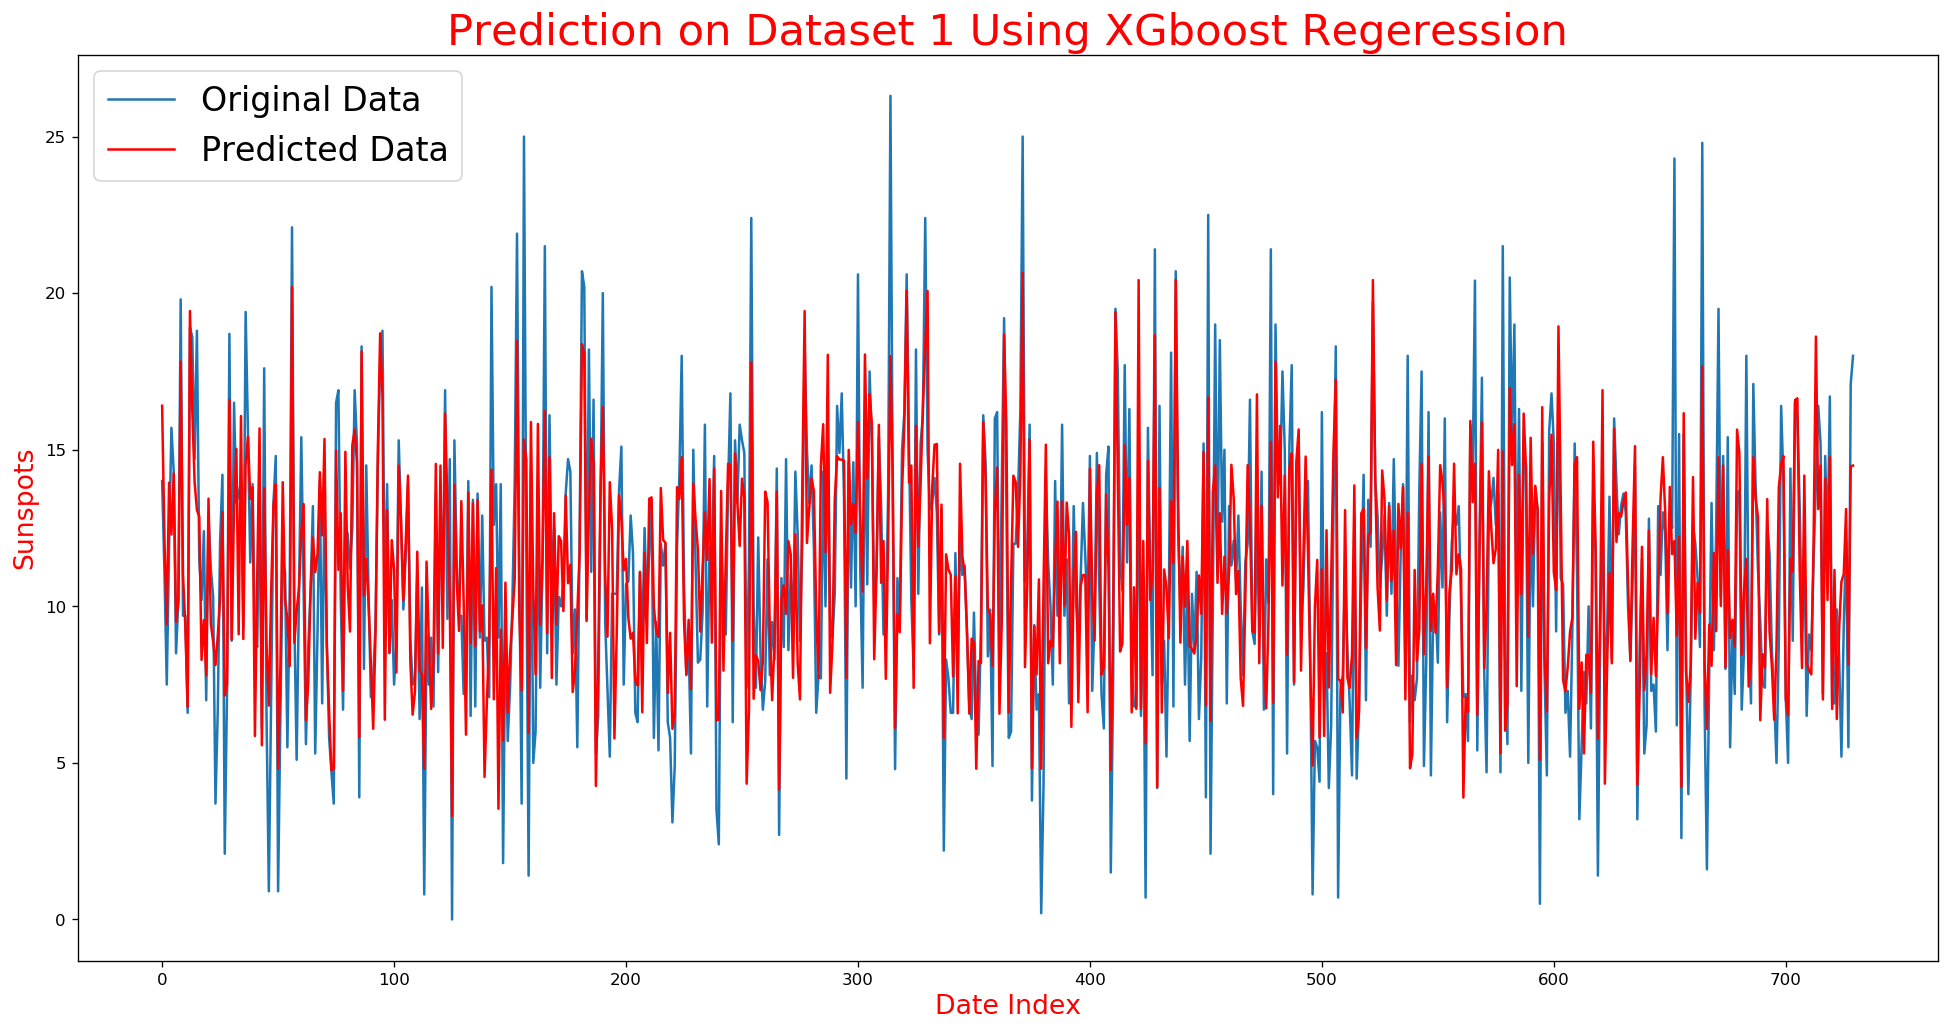

In [23]:
plt.figure(figsize=(20,10))
plt.plot(y_test.values, label='Original Data')
plt.plot(predict, color='red', label='Predicted Data')
plt.title('Prediction on Dataset 1 Using XGboost Regeression',color='red',fontsize=26)
plt.xlabel('Date Index',color='red',fontsize=16)     
plt.ylabel('Sunspots',color='red',fontsize=16)            
plt.legend(prop={'size': 20})
plt.show()   